In [8]:
%matplotlib notebook

# general tools
import numpy as np
from numpy import random
import scipy as sp

# tree/simulation
from prosstt import simulation as sim
from prosstt import tree
from prosstt.tree import Tree

# dimensionality reduction and visualization
from scanpy.tools import diffmap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# set random seed
rseed = 42
random.seed(rseed)

make a tree with (almost) default parameters and define sample time and base gene expression values

In [3]:
t = tree.Tree(modules=8, time=[50]*3, G=100)
sample_time = np.arange(0, t.get_max_time())
gene_scale = np.exp(sp.stats.norm.rvs(loc=0.8, scale=1, size=t.G))

simulate average gene expression over the tree

In [4]:
Ms = None
while not sim.are_lengths_ok(Ms):
    uMs, Ws, Hs = sim.simulate_branching_data(t, tol=0.1)
    Ms = [np.zeros((t.time[i], t.G)) for i in range(t.branches)]
    for i in range(t.branches):
        Ms[i] = np.exp(uMs[i]) * gene_scale

t.add_genes(Ms)

/home/npapado/miniconda2/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


set variance hyperparameters at three levels and observe how the tree reconstruction changes

values in normal range

In [5]:
alpha1 = np.exp(random.normal(loc=np.log(0.2), scale=np.log(1.5), size=t.G))
beta1 = np.exp(random.normal(loc=np.log(1), scale=np.log(1.5), size=t.G)) + 1

X1, labs1, brns1, scalings1 = sim.sample_data_balanced(1, t.G, t, sample_time, alpha1, beta1)

# normalize gene expression by library size
X1 = (X1.transpose() / scalings1).transpose()

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.3% 

higher average values, same variance

In [6]:
alpha2 = np.exp(random.normal(loc=np.log(1.2), scale=np.log(1.5), size=t.G))
beta2 = np.exp(random.normal(loc=np.log(2), scale=np.log(1.5), size=t.G)) + 1

X2, labs2, brns2, scalings2 = sim.sample_data_balanced(1, t.G, t, sample_time, alpha2, beta2)

# normalize gene expression by library size
X2 = (X2.transpose() / scalings2).transpose()

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.3% 

higher variance for same range

In [7]:
alpha3 = np.exp(random.normal(loc=np.log(0.2), scale=np.log(3.5), size=t.G))
beta3 = np.exp(random.normal(loc=np.log(1), scale=np.log(3.5), size=t.G)) + 1

X3, labs3, brns3, scalings3 = sim.sample_data_balanced(1, t.G, t, sample_time, alpha3, beta3)

# normalize gene expression by library size
X3 = (X3.transpose() / scalings3).transpose()

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.3% 

perform dimensionality reduction and plot to see the differences

In [13]:
# todo: replace with diffusion map
pca = PCA(n_components=2)
pca1 = pca.fit_transform(X1)
pca2 = pca.fit_transform(X2)
pca3 = pca.fit_transform(X3)

<IPython.core.display.Javascript object>


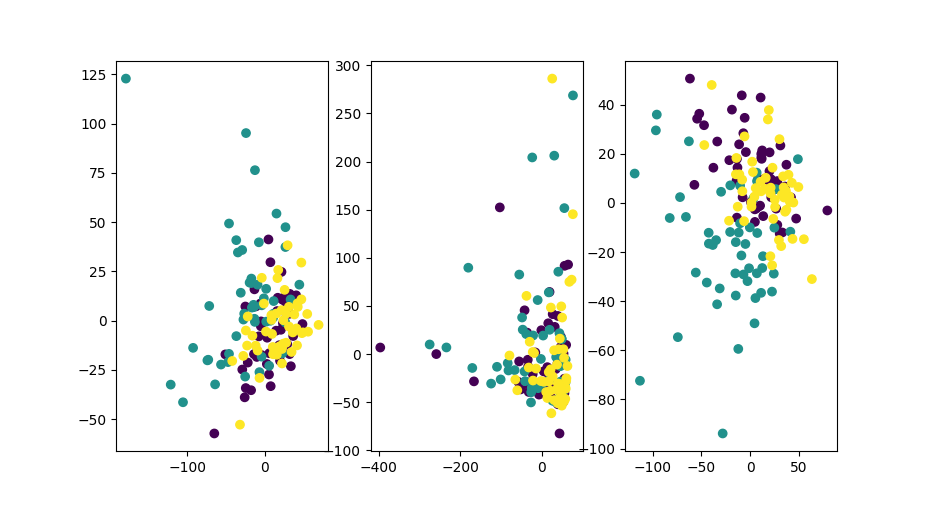

In [14]:
fig, ax = plt.subplots(ncols=3)
ax[0].scatter(pca1[:, 0], pca1[:, 1], c=brns1)
ax[1].scatter(pca2[:, 0], pca2[:, 1], c=brns2)
ax[2].scatter(pca3[:, 0], pca3[:, 1], c=brns3)